# Fake News Detection Using Machine Learning and Deep Learning Models

This notebook aims to classify fake news from real news.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Machine Learning
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer # Import for transforming text into numerical features using TF-IDF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Text processing
from wordcloud import WordCloud  # Import for generating word clouds

# Mounting Google Drive
from google.colab import drive  # Import for accessing Google Drive

# Unzipping files
import zipfile  # Import for extracting zip files


Read the data

In [2]:
# Mount your Google Drive
drive.mount('/content/drive')

# Get the file path from Google Drive
file_path = '/content/drive/MyDrive/fake news/archive.zip'

# Unzip the file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Find the CSV file in the zip folder
    csv_filename = next(name for name in zip_ref.namelist() if name.endswith('.csv'))
    # Extract the CSV file to the current directory
    zip_ref.extract(csv_filename, path='/content')

# Read the csv file from the unzipped directory
df = pd.read_csv(f'/content/{csv_filename}')

# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]

Mounted at /content/drive


## EDA

In [3]:
df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
5  All we can say on this one is it s about time ...      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


Check out the distribution of fake news compare to real news

([<matplotlib.patches.Wedge at 0x7fa20f173b50>,
 [Text(-1.1993655425032221, -0.039016604874742726, 'Fake'),
  Text(1.1993655425032221, 0.03901660487474258, 'True')],
 [Text(-0.6996298997935462, -0.022759686176933257, '51.0%'),
  Text(0.6996298997935462, 0.022759686176933167, '49.0%')])

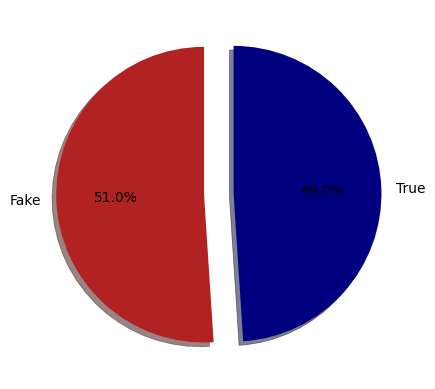

In [5]:
# Checking if our df is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

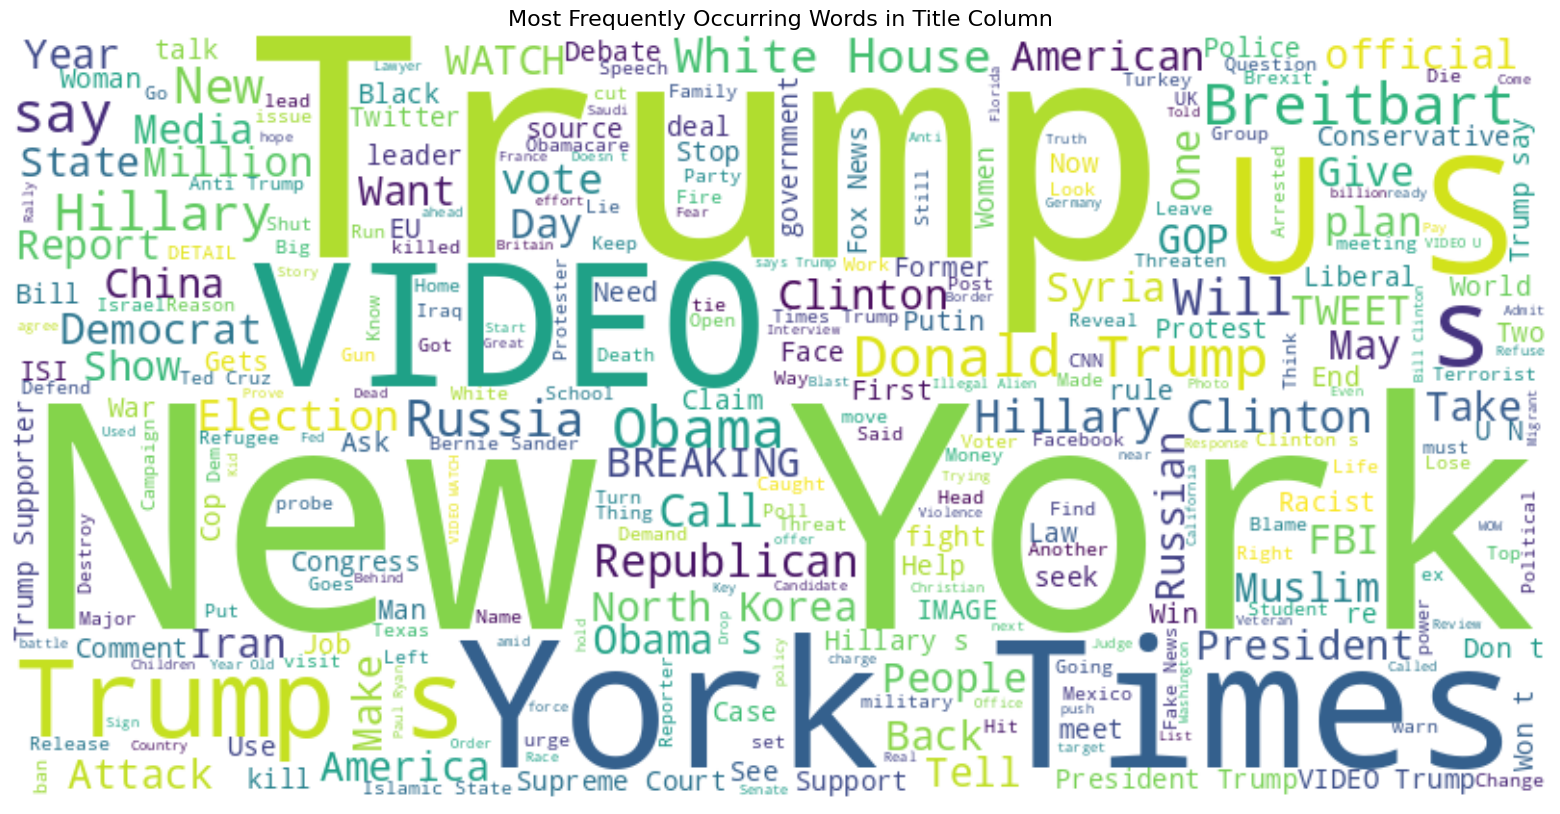

In [6]:
# Concatenate all the titles from the 'title' column in the DataFrame into a single string
titles = ' '.join(title for title in df['title'])

# Create a WordCloud object with specified configurations
wordcloud = WordCloud(
    background_color='white',  # Set the background color of the word cloud to white
    max_words=300,  # Set the maximum number of words to be displayed in the word cloud
    width=800,  # Set the width of the word cloud figure
    height=400  # Set the height of the word cloud figure
).generate(titles)  # Generate the word cloud based on the concatenated titles

# Display the word cloud figure
plt.figure(figsize=(20, 10))  # Set the size of the figure to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis("off")  # Turn off the axis labels and ticks

# Set the title of the plot
plt.title("Most Frequently Occurring Words in Title Column", fontsize=16)

plt.show()  # Show the word cloud figure

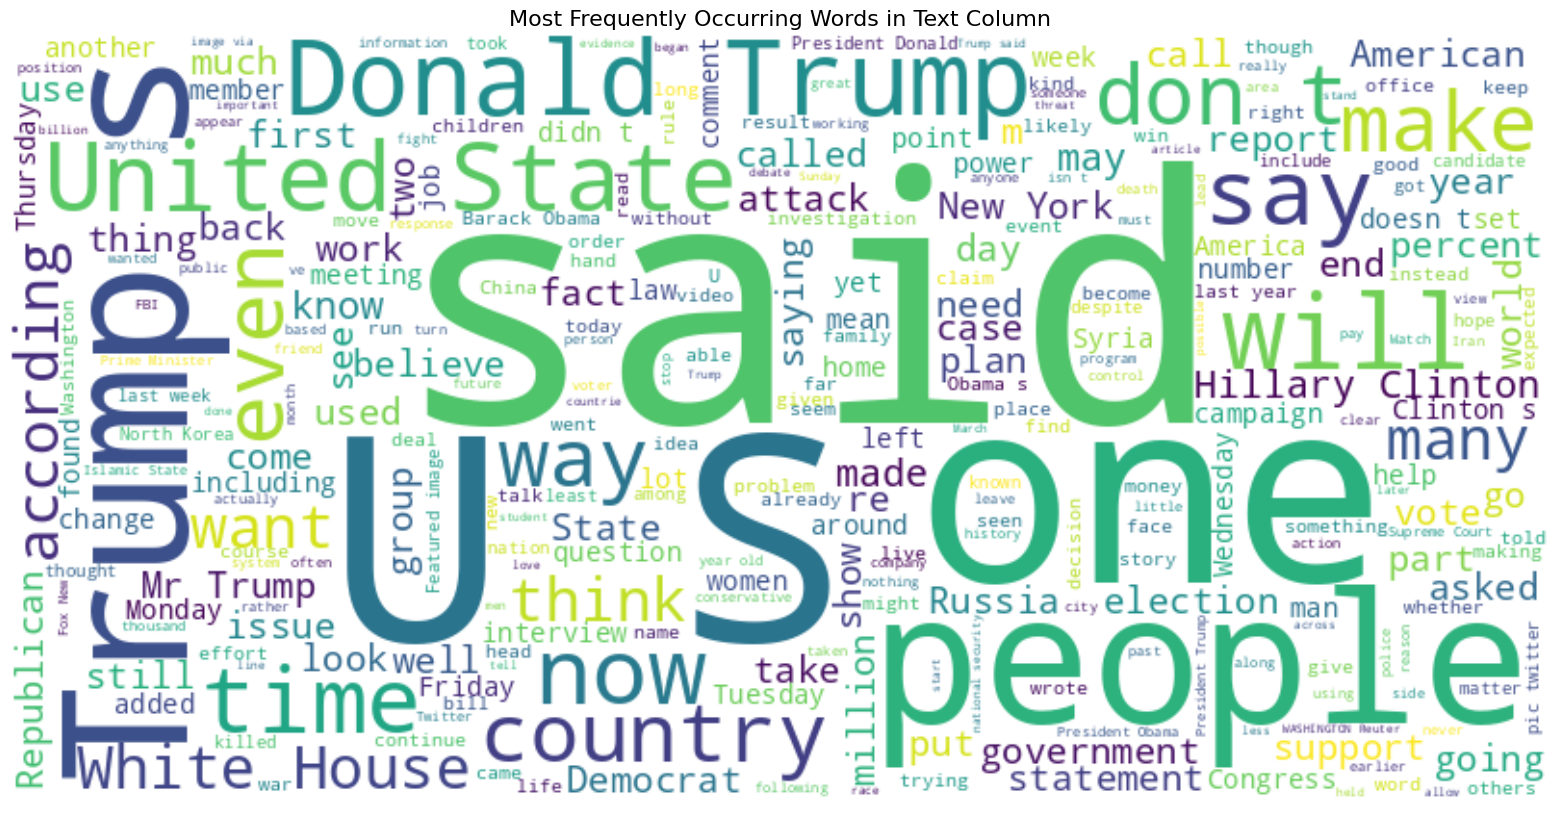

In [7]:
titles = ' '.join(title for title in df['text'])
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Set the title of the plot
plt.title("Most Frequently Occurring Words in Text Column", fontsize=16)
plt.show()

Split into training and testing

In [8]:
features = df['text']
targets = df['label']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

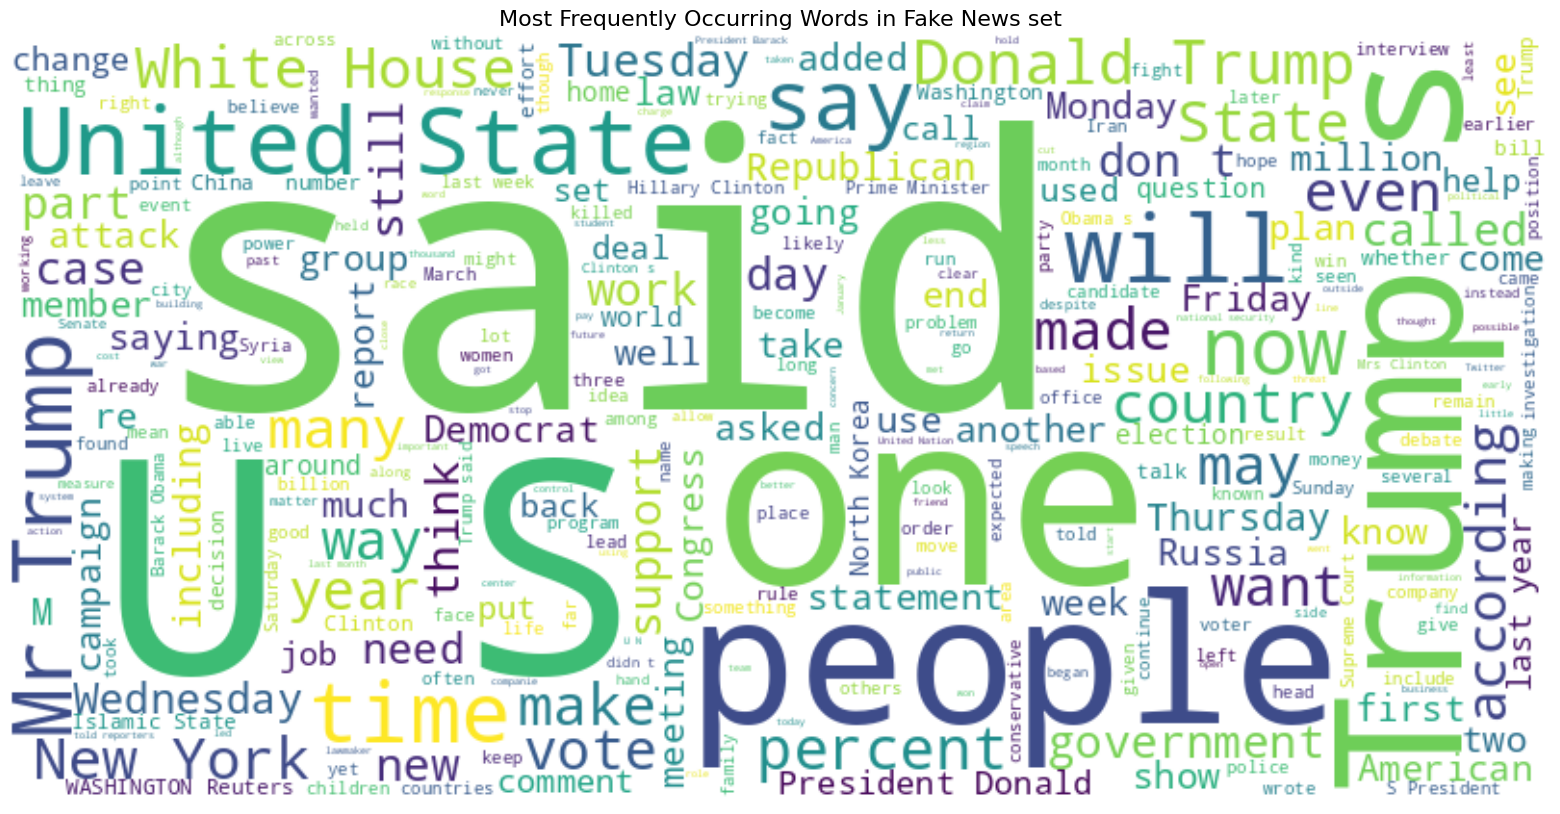

In [9]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Set the title of the plot
plt.title("Most Frequently Occurring Words in Fake News set", fontsize=16)
plt.show()

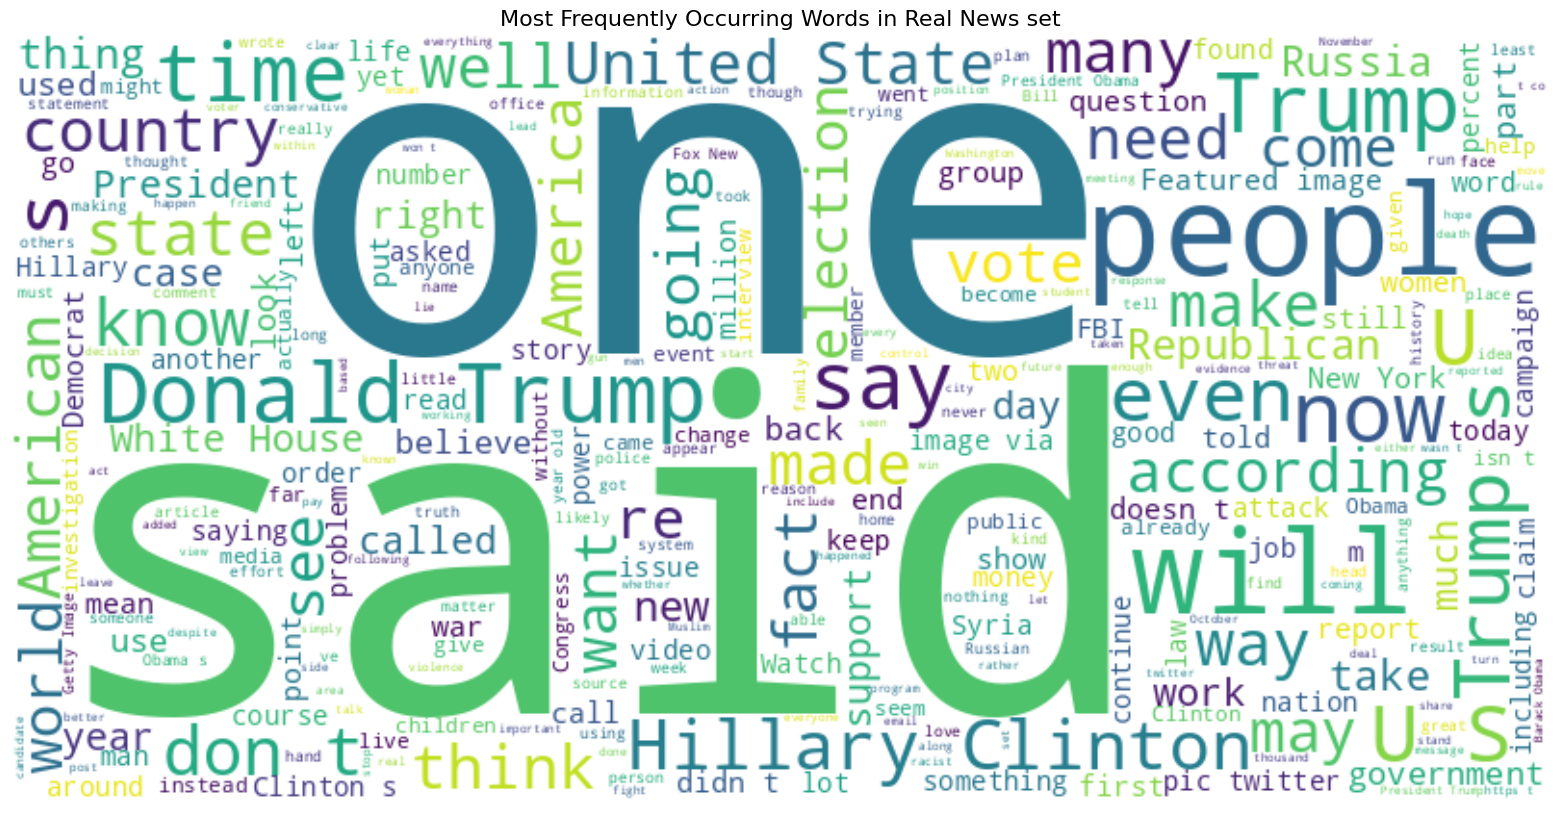

In [10]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Set the title of the plot
plt.title("Most Frequently Occurring Words in Real News set", fontsize=16)
plt.show()

# Machine Learning

## Decision Tree

In [11]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [12]:
dt = DecisionTreeClassifier()

dt.fit(xv_train,y_train)

DecisionTreeClassifier()

In [13]:
pred=dt.predict(xv_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [14]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('F1 score on testing set:', f1_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9205339670114622
F1 score on testing set: 0.9225529596076562
Precision on testing set: 0.9347135955831608
Recall on testing set: 0.9107046799354491


## Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
rfc.score(xv_test, y_test)

0.924727425216662

In [17]:
pred = rfc.predict(xv_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [18]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('F1 score on testing set:', f1_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.924727425216662
F1 score on testing set: 0.9267496429300144
Precision on testing set: 0.9403726708074535
Recall on testing set: 0.913515687851971
